# Quick Start

## Installation

The recommended way to install PyMinimax is using pip.

```
pip install pyminimax
```

PyMinimax runs on any platform with Python 3 and NumPy installed. Installing SciPy is not required but strongly recommended as SciPy has the facility to interpret the results by PyMinimax. 

## Usage

There is only one function in PyMinimax, `pyminimax.minimax`, and its usage is the same as the hierarchical clustering methods in SciPy, for example `scipy.cluster.hierarchy.complete`. Here we also demonstrate with the same example as in the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.complete.html). First consider a dataset of $n=12$ points: 

In [1]:
X = [[0, 0], [0, 1], [1, 0], 
     [0, 4], [0, 3], [1, 4], 
     [4, 0], [3, 0], [4, 1], 
     [4, 4], [3, 4], [4, 3]]

    x x    x x
    x        x

    x        x
    x x    x x
    
The minimax function takes a flattened distance matrix of the data as an argument, which can be computed by `scipy.spatial.distance.pdist`. By default, the return value of minimax has the same format as that of `scipy.cluster.hierarchy.linkage`. This is an $(n-1)$ by 4 matrix keeping the clustering result, called the *linkage matrix*. A detailed explanation of its format can be found in the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [2]:
from pyminimax import minimax
from scipy.spatial.distance import pdist
import numpy as np

np.random.seed(0)
X = np.random.rand(12, 2)

Z = minimax(pdist(X), return_prototype=True)

Z

array([[ 0.        , 11.        ,  0.10907128,  2.        ,  0.        ],
       [ 3.        , 12.        ,  0.11378059,  3.        , 11.        ],
       [ 2.        , 13.        ,  0.13984741,  4.        , 11.        ],
       [ 6.        , 14.        ,  0.18000197,  5.        , 11.        ],
       [ 1.        ,  5.        ,  0.18963685,  2.        ,  1.        ],
       [ 9.        , 10.        ,  0.21261486,  2.        ,  9.        ],
       [ 4.        , 16.        ,  0.2252094 ,  3.        ,  5.        ],
       [17.        , 18.        ,  0.34138697,  5.        ,  5.        ],
       [ 8.        , 15.        ,  0.42153982,  6.        ,  3.        ],
       [19.        , 20.        ,  0.54148195, 11.        ,  0.        ],
       [ 7.        , 21.        ,  0.66072543, 12.        ,  2.        ]])

Given the linkage matrix, one can then utilize the methods in SciPy to present the clustering result in a more readable manner. Below are examples applying `dendrogram` and `fcluster`. 

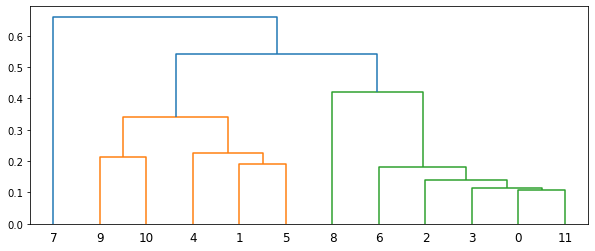

In [3]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 4))
dendrogram(Z[:, :4])
plt.show()

In [28]:
from pandas import DataFrame

DataFrame(Z, columns=['x', 'y', 'dist', 'num_pts', 'prototype']).astype({'x': int, 'y': int, 'num_pts': int, 'prototype': int})

,x,y,dist,num_pts,prototype
0,0,11,0.109071,2,0
1,3,12,0.113781,3,11
2,2,13,0.139847,4,11
3,6,14,0.180002,5,11
4,1,5,0.189637,2,1
5,9,10,0.212615,2,9
6,4,16,0.225209,3,5
7,17,18,0.341387,5,5
8,8,15,0.421540,6,3
9,19,20,0.541482,11,0


In [30]:
from scipy.cluster.hierarchy import fcluster
from collections import defaultdict

clust_lst = fcluster(Z[:, :4], t=0.3, criterion='distance')
idx2clust = dict(enumerate(clust_lst))      # indices and corresponding cluster

clust_dict = defaultdict(set)               # map from cluster to set of indices
for idx, clust in enumerate(clust_lst):
    clust_dict[clust].add(idx)

print(clust_dict)
    
protos = {}
for x, y, _, _, proto in Z:
    if x < n:
        clust = idx2clust[x]
        clust_dict[clust].remove(x)
        if clust_dict[clust] == set([]):
            protos[clust] = proto
    if y < n:
        clust = idx2clust[y]
        clust_dict[clust].remove(y)
        if clust_dict[clust] == set([]):
            protos[clust] = proto

from pandas import Series
Series(protos).to_frame()

defaultdict(<class 'set'>, {3: {0, 2, 3, 6, 11}, 2: {1, 4, 5}, 5: {7}, 4: {8}, 1: {9, 10}})


,0
3,11.0
1,9.0
2,5.0
4,3.0
5,2.0


The above result says that, cutting the dendrogram at 1.8 threshold, the data has 4 clusters, with the first 3 points being in the first cluster, and the following 3 in the second cluster, and so on. 

## See Also

* [scipy.cluster.hierarchy.complete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.complete.html)
* [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
* [scipy.cluster.hierarchy.fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)
* [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
* [scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)